In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [157]:
df  = pd.read_csv(r"C:\Users\mansi\Downloads\machine_learning_project\Electric_Vehicle_Population_Data.csv")
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,15.0,249905295,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1G1FY6S03L,Kitsap,Kingston,WA,98346.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,23.0,141133765,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303594e+10
2,KNDCE3LG9K,King,Seattle,WA,98125.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,46.0,3410074,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ0CP8E,Thurston,Olympia,WA,98506.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,182436474,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJXCAE29L,Kitsap,Silverdale,WA,98383.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,23.0,1843054,POINT (-122.69275 47.65171),PUGET SOUND ENERGY INC,5.303509e+10


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239747 entries, 0 to 239746
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         239747 non-null  object 
 1   County                                             239744 non-null  object 
 2   City                                               239744 non-null  object 
 3   State                                              239747 non-null  object 
 4   Postal Code                                        239744 non-null  float64
 5   Model Year                                         239747 non-null  int64  
 6   Make                                               239747 non-null  object 
 7   Model                                              239747 non-null  object 
 8   Electric Vehicle Type                              239747 non-null  object

In [159]:
df.isnull().sum()    #IT  CONTAIN NULL VALUES 

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        49
Base MSRP                                             49
Legislative District                                 515
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [160]:

df.duplicated().sum()    # there is no duplicate value

0

In [161]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,239744.000000,239747.000000,239698.000000,239698.000000,239232.000000,2.397470e+05,2.397440e+05
mean,98176.643908,2021.460681,45.562283,770.534110,28.876643,2.363185e+08,5.297838e+10
std,2538.393709,2.995484,83.432590,7096.684269,14.896805,6.765169e+07,1.557184e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.071293e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.533600e+08,5.303303e+10
75%,98375.000000,2024.000000,38.000000,0.000000,42.000000,2.701756e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [162]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239747 entries, 0 to 239746
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         239747 non-null  object 
 1   County                                             239744 non-null  object 
 2   City                                               239744 non-null  object 
 3   State                                              239747 non-null  object 
 4   Postal Code                                        239744 non-null  float64
 5   Model Year                                         239747 non-null  int64  
 6   Make                                               239747 non-null  object 
 7   Model                                              239747 non-null  object 
 8   Electric Vehicle Type                              239747 non-null  object

In [164]:
# THIS COLUMN VIN(1-10) IT CONTAIN NO VALUE HENCE , IT IS BETTER TO DROP THIS COLUMN AS PER PREDICTION AND ANALYSIS 
df = df.drop(columns='VIN (1-10)')

In [165]:
df.isnull().sum()  #IT CONTAIN NULL VALUES 

County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        49
Base MSRP                                             49
Legislative District                                 515
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [166]:
df = df.dropna()

In [167]:
df.isnull().sum()

County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [168]:
df['State'].unique()  # it is clear that the state is washinghton so it is better to remove it 

array(['WA'], dtype=object)

In [169]:
df = df.drop(columns='State')

In [170]:
df['Postal code'] = df['Postal Code'].astype(str)
df['Postal Regions'] = df['Postal code'].str[:3]


In [171]:
df[['Postal Regions']].value_counts()

Postal Regions
980               87154
981               50645
982               26816
983               19613
986               16594
985               12035
984                8221
993                4806
992                4671
988                3109
989                2418
990                2108
991                 889
994                  97
Name: count, dtype: int64

In [172]:
encod = LabelEncoder()
df['Postal Regions'] = encod.fit_transform(df['Postal Regions'])
df['City'] =encod.fit_transform(df['City'])
df['County']  =encod.fit_transform(df['County'])
df['Make'] = encod.fit_transform(df['Make'])
df['Model'] = encod.fit_transform(df['Model'])

In [173]:
df = df.drop(columns ='Postal code')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239176 entries, 0 to 239746
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             239176 non-null  int32  
 1   City                                               239176 non-null  int32  
 2   Postal Code                                        239176 non-null  float64
 3   Model Year                                         239176 non-null  int64  
 4   Make                                               239176 non-null  int32  
 5   Model                                              239176 non-null  int32  
 6   Electric Vehicle Type                              239176 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  239176 non-null  object 
 8   Electric Range                                     239176 non-null  float64
 9 

In [175]:
df[['County' , 'City' , 'Postal Regions']].corr()  
#IT SHOWS COUNTY WITH CITY AS WEAK CO-RELATEION
# IT SHOWS CITY WITH COUNTY AND POSTAL REGION AS NO RELATATION
# POSTAL REGION DO NOT HAVE ANY NEGATIVE CO-RELATION WITH OTHERS

,County,City,Postal Regions
County,1.000000,-0.173393,0.021583
City,-0.173393,1.000000,0.202853
Postal Regions,0.021583,0.202853,1.000000


In [176]:
df.columns

Index(['County', 'City', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Postal Regions'],
      dtype='object')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239176 entries, 0 to 239746
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             239176 non-null  int32  
 1   City                                               239176 non-null  int32  
 2   Postal Code                                        239176 non-null  float64
 3   Model Year                                         239176 non-null  int64  
 4   Make                                               239176 non-null  int32  
 5   Model                                              239176 non-null  int32  
 6   Electric Vehicle Type                              239176 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  239176 non-null  object 
 8   Electric Range                                     239176 non-null  float64
 9 

In [178]:
tt = {
    'Battery Electric Vehicle (BEV)':0,
    'Plug-in Hybrid Electric Vehicle (PHEV)':1

}
df['Electric Vehicle Type']  = df['Electric Vehicle Type'].map(tt)

In [179]:
dd = {
    'Eligibility unknown as battery range has not been researched' : 0,
    'Clean Alternative Fuel Vehicle Eligible' : 1,
    'Not eligible due to low battery range': 2
}
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(dd)

In [180]:
df = df.drop(columns = ['DOL Vehicle ID', 'Vehicle Location' , '2020 Census Tract' , 'Electric Utility','Postal Code'])  #SINCE UNIQUE VEHICLE ID WILL NOT CONTRIBUTE IN ML MODEL

<Axes: xlabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

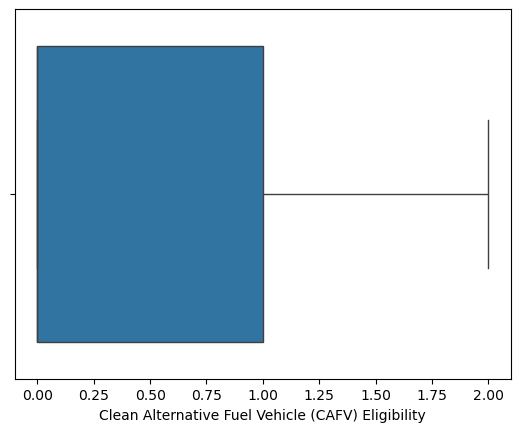

In [182]:
sns.boxplot(x = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

<Axes: >

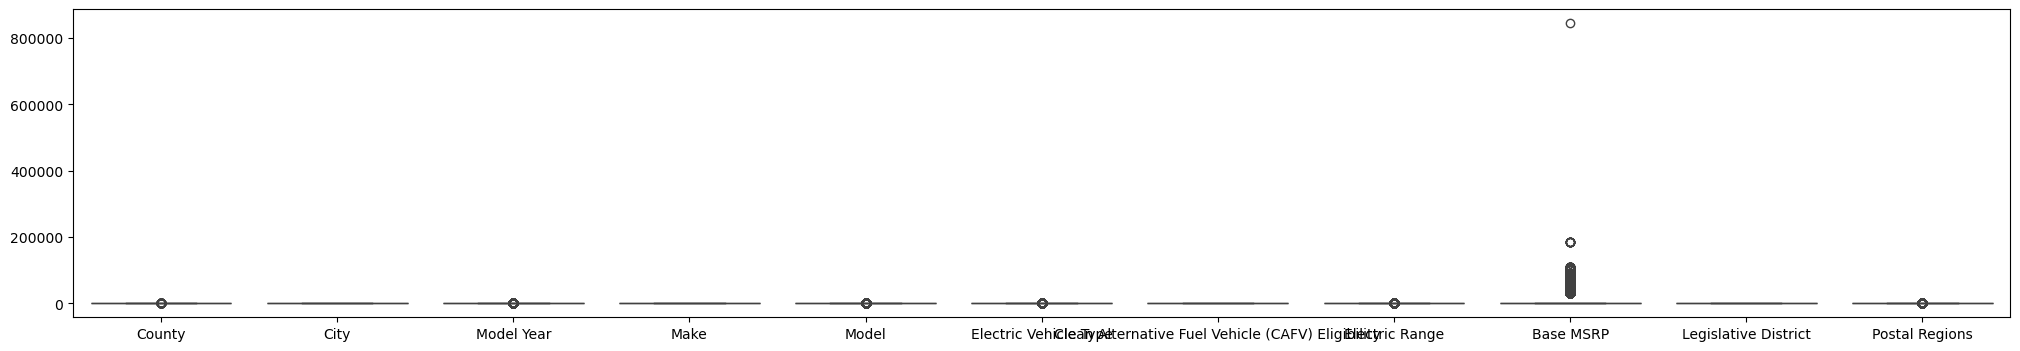

In [183]:
plt.figure(figsize = (25,4))
sns.boxplot(df)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239176 entries, 0 to 239746
Data columns (total 11 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             239176 non-null  int32  
 1   City                                               239176 non-null  int32  
 2   Model Year                                         239176 non-null  int64  
 3   Make                                               239176 non-null  int32  
 4   Model                                              239176 non-null  int32  
 5   Electric Vehicle Type                              239176 non-null  int64  
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  239176 non-null  int64  
 7   Electric Range                                     239176 non-null  float64
 8   Base MSRP                                          239176 non-null  float64
 9 

DETECTING AND REMOVING OUTLIERS 


In [185]:
Q1 = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].quantile(0.25)
Q3 = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].quantile(0.75)
IQR = Q3-Q1
upper_bound  = Q3 +1.5*IQR
lower_bound  = Q1 - 1.5* IQR
df = df[(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] >= lower_bound) & df(['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] <= upper_bound)]
df

UFuncTypeError: ufunc 'greater_equal' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> <class 'numpy.dtypes.BoolDType'>

In [ ]:
df.corr()

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Postal Regions
County,1.000000,-0.173393,-0.010388,-0.016625,-0.015175,-0.002555,-0.003317,-0.006838,-0.001233,-0.098395,0.021583
City,-0.173393,1.000000,-0.005482,-0.043254,0.004135,0.047172,0.040164,0.000807,-0.006163,0.005888,0.202853
Model Year,-0.010388,-0.005482,1.000000,0.075883,0.039921,-0.148099,-0.547396,-0.532390,-0.227054,-0.012793,-0.044380
Make,-0.016625,-0.043254,0.075883,1.000000,0.216724,-0.328308,-0.224074,0.046728,0.017745,0.038356,-0.061688
Model,-0.015175,0.004135,0.039921,0.216724,1.000000,0.308292,0.134515,-0.073351,-0.005636,-0.007680,-0.005466
Electric Vehicle Type,-0.002555,0.047172,-0.148099,-0.328308,0.308292,1.000000,0.740104,-0.087182,0.035472,-0.056396,0.084852
Clean Alternative Fuel Vehicle (CAFV) Eligibility,-0.003317,0.040164,-0.547396,-0.224074,0.134515,0.740104,1.000000,0.446797,0.131207,-0.032404,0.077081
Electric Range,-0.006838,0.000807,-0.532390,0.046728,-0.073351,-0.087182,0.446797,1.000000,0.116458,0.015603,0.012867
Base MSRP,-0.001233,-0.006163,-0.227054,0.017745,-0.005636,0.035472,0.131207,0.116458,1.000000,0.009744,-0.002623
Legislative District,-0.098395,0.005888,-0.012793,0.038356,-0.007680,-0.056396,-0.032404,0.015603,0.009744,1.000000,-0.408145


Text(0.5, 14.722222222222216, 'heatmap of dataset')

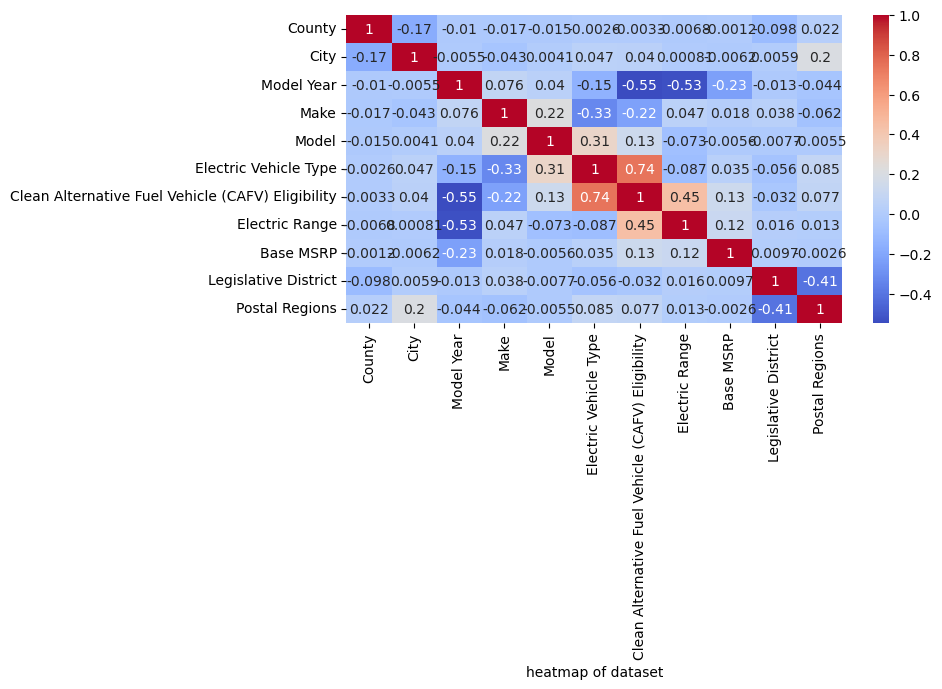

In [ ]:
plt.figure(figsize =(8,4))
sns.heatmap(df.corr() , annot  = True , cmap  = 'coolwarm')
plt.xlabel("heatmap of dataset")

CHECKING BALANCE OF DATA/TARGET VALUE TO BUILD MACHINE LEARNING MODEL ON IT 

In [ ]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
0    142576
1     73731
2     22869
Name: count, dtype: int64